In [11]:
from sklearn.linear_model import LogisticRegression
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from tqdm.notebook import tqdm
import numpy as np

In [12]:
import os
import re
import argparse
import random

In [14]:
# For TTS
from TTS.speaker_encoder.models import lstm, resnet
from TTS.utils.audio import AudioProcessor
from TTS.config import load_config

In [ ]:
data_dir = "path/to/data/2019/english/train"
speaker_regex = "^S(\d+)_"

print(data_dir, os.path.isdir(data_dir))

In [ ]:
print("Found {} files in \"{}\".".format(len(os.listdir(data_dir)), data_dir))
wav_fpaths = []
speakers = []
for fn in os.listdir(data_dir):
    fp = os.path.join(data_dir, fn)
    if os.path.splitext(fn)[1].lower() != ".wav":
        continue
    m = re.match(speaker_regex, fn)
    if m:
        speaker = m.group(1)
        speakers.append(speaker)
        wav_fpaths.append(fp)

print("Found {} wav files.".format(len(wav_fpaths)))

In [49]:
n_data = len(wav_fpaths)

In [31]:
wavs = [preprocess_wav(wav_fpath) for wav_fpath in \
        tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit=" utterances")]

Preprocessing wavs:   0%|          | 0/5941 [00:00<?, ? utterances/s]

In [45]:
markers = ["x"] * len(speakers)
colors = [(random.random(), random.random(), random.random()) for _ in range(len(speakers))]

In [33]:
# Compute the embeddings
encoder = VoiceEncoder()
print("Loaded VoiceEncoder.")

Loaded the voice encoder model on cuda in 0.18 seconds.
Loaded VoiceEncoder.


In [34]:
utterance_embeds = np.array([encoder.embed_utterance(w) for w in
                             tqdm(wavs, "Computing embeddings", len(wavs), unit="embeddings")])

Computing embeddings:   0%|          | 0/5941 [00:00<?, ?embeddings/s]

### TTS

In [15]:
# TODO

## Embedding Projections

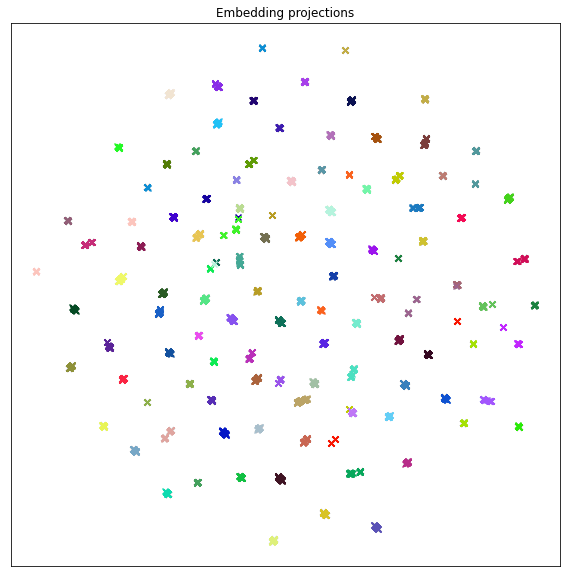

In [48]:
## Project the embeddings in 2D space
_, ax = plt.subplots(figsize=(10, 10))
plot_projections(utterance_embeds, speakers, ax=ax, colors=colors, markers=markers, legend=False, title="Embedding projections")
plt.show()

## 2

In [75]:
import sklearn.metrics as metrics

In [66]:
# Compute a speaker embedding from a random clip for every speaker
speaker_embs = {}
speaker_indices = {}
speakers_unique = set(speakers)
for speaker in speakers_unique:
    indices = [i for i, s in enumerate(speakers) if s == speaker]
    rand_emb = utterance_embeds[random.choice(indices)]
    speaker_embs[speaker] = rand_emb
    speaker_indices[speaker] = indices

In [96]:
same_speaker_thresholds = [0.7, 0.8, 0.85, 0.9, 0.95]

In [101]:
scores_thresholds = []
for thresh in same_speaker_thresholds:
    scores = {}
    for speaker in speakers_unique:
        sim_v = np.dot(utterance_embeds, speaker_embs[speaker].reshape((-1, 1)))
        same_speaker_pred_v = sim_v > thresh
        same_speaker_true_v = np.array([1 if i in set(speaker_indices[speaker]) else 0 for i in range(n_data)])

        confusion_m = metrics.confusion_matrix(same_speaker_true_v, same_speaker_pred_v)
        acc = metrics.accuracy_score(same_speaker_true_v, same_speaker_pred_v)
        precision = metrics.precision_score(same_speaker_true_v, same_speaker_pred_v)
        recall = metrics.recall_score(same_speaker_true_v, same_speaker_pred_v)
        f1 = metrics.f1_score(same_speaker_true_v, same_speaker_pred_v)

        scores[speaker] = {
            'confusion_matrix': confusion_m,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
        }

        print("---------------------------------------------------")
        print("Speaker:", speaker)
        print("Accuracy: {:3.0f}%, Precision: {:3.0f}%, Recall: {:3.0f}%".format(
            100 * acc, 100 * precision, 100 * recall))
        print("F1 Score:{:3.0f}%".format(100 * f1))
        print("Confusion matrix:\n{}".format(confusion_m))
        print()
    scores_thresholds.append(scores)

---------------------------------------------------
Speaker: 080
Accuracy: 100%, Precision: 100%, Recall:  90%
F1 Score: 95%
Confusion matrix:
[[5873    0]
 [   7   61]]

---------------------------------------------------
Speaker: 059
Accuracy:  90%, Precision:  10%, Recall: 100%
F1 Score: 18%
Confusion matrix:
[[5293  582]
 [   0   66]]

---------------------------------------------------
Speaker: 123
Accuracy:  95%, Precision:  20%, Recall: 100%
F1 Score: 33%
Confusion matrix:
[[5606  269]
 [   0   66]]

---------------------------------------------------
Speaker: 107
Accuracy:  96%, Precision:  20%, Recall: 100%
F1 Score: 33%
Confusion matrix:
[[5667  219]
 [   0   55]]

---------------------------------------------------
Speaker: 102
Accuracy:  93%, Precision:  13%, Recall: 100%
F1 Score: 22%
Confusion matrix:
[[5457  423]
 [   0   61]]

---------------------------------------------------
Speaker: 053
Accuracy:  97%, Precision:  28%, Recall: 100%
F1 Score: 44%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 090
Accuracy:  99%, Precision:  40%, Recall: 100%
F1 Score: 57%
Confusion matrix:
[[5802   84]
 [   0   55]]

---------------------------------------------------
Speaker: 115
Accuracy:  93%, Precision:  12%, Recall: 100%
F1 Score: 21%
Confusion matrix:
[[5448  435]
 [   0   58]]

---------------------------------------------------
Speaker: 051
Accuracy:  93%, Precision:  12%, Recall: 100%
F1 Score: 21%
Confusion matrix:
[[5459  424]
 [   0   58]]

---------------------------------------------------
Speaker: 120
Accuracy:  95%, Precision:  15%, Recall: 100%
F1 Score: 26%
Confusion matrix:
[[5572  315]
 [   0   54]]

---------------------------------------------------
Speaker: 055
Accuracy:  97%, Precision:  25%, Recall: 100%
F1 Score: 40%
Confusion matrix:
[[5718  167]
 [   0   56]]

---------------------------------------------------
Speaker: 127
Accuracy: 100%, Precision:  91%, Recall: 100%
F1 Score: 95%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 126
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5888    0]
 [   0   53]]

---------------------------------------------------
Speaker: 045
Accuracy: 100%, Precision: 100%, Recall:  89%
F1 Score: 94%
Confusion matrix:
[[5880    0]
 [   7   54]]

---------------------------------------------------
Speaker: 101
Accuracy: 100%, Precision:  76%, Recall: 100%
F1 Score: 87%
Confusion matrix:
[[5869   17]
 [   0   55]]

---------------------------------------------------
Speaker: 085
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5886    0]
 [   0   55]]

---------------------------------------------------
Speaker: 015
Accuracy: 100%, Precision:  98%, Recall: 100%
F1 Score: 99%
Confusion matrix:
[[5882    1]
 [   0   58]]

---------------------------------------------------
Speaker: 072
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 114
Accuracy: 100%, Precision:  90%, Recall:  98%
F1 Score: 94%
Confusion matrix:
[[5872    7]
 [   1   61]]

---------------------------------------------------
Speaker: 121
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5875    0]
 [   0   66]]

---------------------------------------------------
Speaker: 078
Accuracy:  99%, Precision:  64%, Recall:  98%
F1 Score: 78%
Confusion matrix:
[[5856   30]
 [   1   54]]

---------------------------------------------------
Speaker: 020
Accuracy:  99%, Precision:  57%, Recall:  59%
F1 Score: 58%
Confusion matrix:
[[5857   26]
 [  24   34]]

---------------------------------------------------
Speaker: 084
Accuracy: 100%, Precision: 100%, Recall:  98%
F1 Score: 99%
Confusion matrix:
[[5878    0]
 [   1   62]]

---------------------------------------------------
Speaker: 047
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 107
Accuracy: 100%, Precision: 100%, Recall:  98%
F1 Score: 99%
Confusion matrix:
[[5886    0]
 [   1   54]]

---------------------------------------------------
Speaker: 102
Accuracy: 100%, Precision: 100%, Recall:  95%
F1 Score: 97%
Confusion matrix:
[[5880    0]
 [   3   58]]

---------------------------------------------------
Speaker: 053
Accuracy: 100%, Precision: 100%, Recall:  97%
F1 Score: 98%
Confusion matrix:
[[5883    0]
 [   2   56]]

---------------------------------------------------
Speaker: 041
Accuracy: 100%, Precision: 100%, Recall:  98%
F1 Score: 99%
Confusion matrix:
[[5881    0]
 [   1   59]]

---------------------------------------------------
Speaker: 126
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5888    0]
 [   0   53]]

---------------------------------------------------
Speaker: 045
Accuracy:  99%, Precision: 100%, Recall:  30%
F1 Score: 46%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 114
Accuracy: 100%, Precision: 100%, Recall:  98%
F1 Score: 99%
Confusion matrix:
[[5879    0]
 [   1   61]]

---------------------------------------------------
Speaker: 121
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5875    0]
 [   0   66]]

---------------------------------------------------
Speaker: 078
Accuracy: 100%, Precision: 100%, Recall:  96%
F1 Score: 98%
Confusion matrix:
[[5886    0]
 [   2   53]]

---------------------------------------------------
Speaker: 020
Accuracy: 100%, Precision: 100%, Recall:  59%
F1 Score: 74%
Confusion matrix:
[[5883    0]
 [  24   34]]

---------------------------------------------------
Speaker: 084
Accuracy: 100%, Precision: 100%, Recall:  97%
F1 Score: 98%
Confusion matrix:
[[5878    0]
 [   2   61]]

---------------------------------------------------
Speaker: 047
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 072
Accuracy: 100%, Precision: 100%, Recall:  59%
F1 Score: 74%
Confusion matrix:
[[5885    0]
 [  23   33]]

---------------------------------------------------
Speaker: 104
Accuracy: 100%, Precision: 100%, Recall:  97%
F1 Score: 98%
Confusion matrix:
[[5883    0]
 [   2   56]]

---------------------------------------------------
Speaker: 023
Accuracy: 100%, Precision: 100%, Recall:  84%
F1 Score: 91%
Confusion matrix:
[[5874    0]
 [  11   56]]

---------------------------------------------------
Speaker: 065
Accuracy: 100%, Precision: 100%, Recall:  87%
F1 Score: 93%
Confusion matrix:
[[5886    0]
 [   7   48]]

---------------------------------------------------
Speaker: 069
Accuracy: 100%, Precision: 100%, Recall:  59%
F1 Score: 74%
Confusion matrix:
[[5883    0]
 [  24   34]]

---------------------------------------------------
Speaker: 133
Accuracy: 100%, Precision: 100%, Recall:  98%
F1 Score: 99%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 092
Accuracy: 100%, Precision: 100%, Recall:  63%
F1 Score: 77%
Confusion matrix:
[[5887    0]
 [  20   34]]

---------------------------------------------------
Speaker: 082
Accuracy: 100%, Precision: 100%, Recall:  92%
F1 Score: 96%
Confusion matrix:
[[5880    0]
 [   5   56]]

---------------------------------------------------
Speaker: 083
Accuracy: 100%, Precision: 100%, Recall:  94%
F1 Score: 97%
Confusion matrix:
[[5879    0]
 [   4   58]]

---------------------------------------------------
Speaker: 058
Accuracy: 100%, Precision: 100%, Recall:  94%
F1 Score: 97%
Confusion matrix:
[[5879    0]
 [   4   58]]

---------------------------------------------------
Speaker: 056
Accuracy: 100%, Precision: 100%, Recall: 100%
F1 Score:100%
Confusion matrix:
[[5884    0]
 [   0   57]]

---------------------------------------------------
Speaker: 122
Accuracy: 100%, Precision: 100%, Recall:  90%
F1 Score: 95%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 111
Accuracy:  99%, Precision: 100%, Recall:   5%
F1 Score:  9%
Confusion matrix:
[[5878    0]
 [  60    3]]

---------------------------------------------------
Speaker: 131
Accuracy: 100%, Precision: 100%, Recall:  51%
F1 Score: 67%
Confusion matrix:
[[5886    0]
 [  27   28]]

---------------------------------------------------
Speaker: 032
Accuracy:  99%, Precision: 100%, Recall:  11%
F1 Score: 20%
Confusion matrix:
[[5861    0]
 [  71    9]]

---------------------------------------------------
Speaker: 076
Accuracy:  99%, Precision: 100%, Recall:  11%
F1 Score: 20%
Confusion matrix:
[[5867    0]
 [  66    8]]

---------------------------------------------------
Speaker: 103
Accuracy:  99%, Precision: 100%, Recall:   2%
F1 Score:  4%
Confusion matrix:
[[5888    0]
 [  52    1]]

---------------------------------------------------
Speaker: 042
Accuracy:  99%, Precision: 100%, Recall:   2%
F1 Score:  3%
Confusion matrix:
[[

---------------------------------------------------
Speaker: 040
Accuracy:  99%, Precision: 100%, Recall:  31%
F1 Score: 48%
Confusion matrix:
[[5877    0]
 [  44   20]]

---------------------------------------------------
Speaker: 027
Accuracy:  99%, Precision: 100%, Recall:  25%
F1 Score: 40%
Confusion matrix:
[[5885    0]
 [  42   14]]

---------------------------------------------------
Speaker: 129
Accuracy:  99%, Precision: 100%, Recall:  44%
F1 Score: 61%
Confusion matrix:
[[5886    0]
 [  31   24]]

---------------------------------------------------
Speaker: 052
Accuracy:  99%, Precision: 100%, Recall:   2%
F1 Score:  3%
Confusion matrix:
[[5878    0]
 [  62    1]]

---------------------------------------------------
Speaker: 038
Accuracy:  99%, Precision: 100%, Recall:  18%
F1 Score: 31%
Confusion matrix:
[[5870    0]
 [  58   13]]

---------------------------------------------------
Speaker: 077
Accuracy:  99%, Precision: 100%, Recall:   2%
F1 Score:  4%
Confusion matrix:
[[

In [102]:
for thresh, scores in zip(same_speaker_thresholds, scores_thresholds):
    print("Threshold:", thresh)
    score_metrics = next(iter(scores.values())).keys()
    avg_scores = {}
    for m in score_metrics:
        if m != 'confusion_matrix':
            avg_scores[m] = np.mean([s_scores[m] for s_scores in scores.values()])
    print("Average Scores:\n{}".format(avg_scores))
    print()

Threshold: 0.7
Average Scores:
{'accuracy': 0.9512102339673456, 'precision': 0.23255143953719112, 'recall': 0.9888763179781398, 'f1_score': 0.34588039923223485}

Threshold: 0.8
Average Scores:
{'accuracy': 0.9982646019188688, 'precision': 0.9171032124364938, 'recall': 0.9513916920629398, 'f1_score': 0.9210721181814578}

Threshold: 0.85
Average Scores:
{'accuracy': 0.9986736239690288, 'precision': 0.992975955017153, 'recall': 0.8774174948026066, 'f1_score': 0.9112674304709545}

Threshold: 0.9
Average Scores:
{'accuracy': 0.9972630870223869, 'precision': 1.0, 'recall': 0.7293778941162442, 'f1_score': 0.8071263749994011}

Threshold: 0.95
Average Scores:
{'accuracy': 0.9923918532233631, 'precision': 1.0, 'recall': 0.24195367427968734, 'f1_score': 0.34548244920254234}

